In [1]:
"""
Created on Sun May 17 00:09:39 2020
HW3 A3 Kernels
@author: Leah
"""

import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn import model_selection 
loo = model_selection.LeaveOneOut()


In [2]:
def create_data(n):
    ##x_i
    X = np.arange(1,n+1)/float(n)
    ##f(x_i)
    #fx = 4* np.sin(np.pi * X) * np.cos(6 * np.pi * X**2)
    ##y_i
    y = 4* np.sin(np.pi * X) * np.cos(6 * np.pi * X**2) + np.random.randn(n)
    return X,y

In [3]:
def K_poly(X, d):
    K = np.zeros((X.shape[0],X.shape[0]))

    for i in np.arange(X.shape[0]):
        for j in np.arange(X.shape[0]):
            terms_to_eval = (1+np.dot(X[i].T,X[j]))
            K[i][j] = terms_to_eval**d
    return K

#    n = X.shape[0]
#    K = np.zeros((n,n))
#
#    for i in np.arange(n):
#        for j in np.arange(n):
#            K[i][j]  = (1 + np.dot(X[i].T,X[j]))**d
#    return K

def K_RBF(X, gamma):

    n = X.shape[0]
    K = np.zeros((n,n))

    for i in np.arange(n):
        for j in np.arange(n):
            K[i][j]  = np.exp(-gamma*(np.linalg.norm(X[i]-X[j])**2))
    return K

def alpha_hat_compute(K,lambda_val,y):
    #alpha = (k+lamda*I)^(-1)*y
    lhs = K + lambda_val*np.identity(np.shape(K)[0])
    alpha_hat = np.linalg.solve(lhs,y)

    return alpha_hat

def alpha_hat(K, lamda, y):
    obj = K + lamda*np.identity(np.shape(K)[0])
    alpha_hat = np.linalg.solve(obj, y)

    return alpha_hat


def to_kernel_poly(d, x1, x2):
    kernel_poly = []
    for i in np.arange(x2.shape[0]):
        eval_iter = float((1+np.dot(x1,x2[i]))**d)
        kernel_poly.append(eval_iter)
        
    return kernel_poly

def to_kernel_RBF(gamma, x1, x2):
    kernel_RBF = []
    for i in np.arange(x2.shape[0]):
        eval_iter = np.exp(-gamma*(np.linalg.norm(x1-x2[i])**2))
        kernel_RBF.append(eval_iter)
        
    return kernel_RBF

def cost_function(pre,real):
    
    cost = np.linalg.norm(pre-real)
    cost_total = np.sqrt(np.sum(cost))
    return cost_total

def LOO_poly(X, y, lamda_list,d_list):

    cost_history = np.zeros((lamda_list.shape[0],d_list.shape[0]))
    lambda_iter = 0

    for lamda in lamda_list:
        d_iter = 0

        for d in d_list:
            #print('lambda = {},d={}'.format(lamda,d))
            score_history = []
            for train_index, test_index in loo.split(X):
                X_train, X_test = X[train_index], X[test_index] 
                y_train, y_test = y[train_index], y[test_index]
                K = K_poly(X_train, d)
                alpha__hat = alpha_hat_compute(K,lamda,y_train)
                eval_kernel = to_kernel_poly(d, X_test,X_train)
                f_hat = np.array([np.sum(alpha__hat.flatten()*eval_kernel)]) #f_hat
                cost = cost_function(f_hat,y_test)
                score_history.append(cost)
                
            cost_history[lambda_iter][d_iter] = np.mean(score_history)
            
            d_iter += 1

        lambda_iter += 1
        
    return cost_history

def LOO_RBF(X, y, lamda_list,gamma_list):

    cost_history = np.zeros((lamda_list.shape[0],gamma_list.shape[0]))
    lambda_iter = 0

    for lamda in lamda_list:
        gamma_iter = 0

        for gamma in gamma_list:
            #print('lambda = {},d={}'.format(lamda,d))
            score_history = []
            for train_index, test_index in loo.split(X):
                X_train, X_test = X[train_index], X[test_index] 
                y_train, y_test = y[train_index], y[test_index]
                K = K_RBF(X_train, gamma)
                alpha__hat = alpha_hat_compute(K,lamda,y_train)
                eval_kernel = to_kernel_RBF(gamma, X_test,X_train)
                f_hat = np.array([np.sum(alpha__hat.flatten()*eval_kernel)]) #f_hat
                cost = cost_function(f_hat,y_test)
                score_history.append(cost)
                
            cost_history[lambda_iter][gamma_iter] = np.mean(score_history)
            
            gamma_iter += 1

        lambda_iter += 1
        
    return cost_history

In [4]:
def plot_poly(X,y,xx,f_x,lamda,d):
    #plt.figure(dpi=600)
    K = K_poly(X, d)
    alpha__hat = alpha_hat_compute(K,lamda,y)
    f_hat = np.zeros((xx.shape))
    for i in np.arange(xx.shape[0]):
        eval_kernel = to_kernel_poly(d,float(xx[i]),X)
        y_pre = np.sum(alpha__hat.flatten()*np.array(eval_kernel))
        f_hat[i] = y_pre

    plt.figure()
    plt.plot(X,y,'o',label='original data')
    plt.plot(xx,f_x,label='true f(x)')
    plt.plot(xx,f_hat,label='$f^hat(x)$')
    plt.xlabel('x')
    plt.ylabel('f(x) or y')
    plt.title('Polynomial, lambda = {}, d = {}'.format(lamda,d))
    plt.legend()
    plt.ylim([-5,5])


def plot_RBF(X,y,xx,f_x,lamda,gamma):
    K = K_RBF(X, gamma)
    alpha__hat = alpha_hat_compute(K,lamda,y)
    f_hat = np.zeros((xx.shape))
    for i in np.arange(xx.shape[0]):
        eval_kernel = to_kernel_RBF(gamma,float(xx[i]),X)
        y_pre = np.sum(alpha__hat.flatten()*np.array(eval_kernel))
        f_hat[i] = y_pre

    plt.figure()
    plt.plot(X,y,'o',label='original data')
    plt.plot(xx,f_x,label='true f(x)')
    plt.plot(xx,f_hat,label='$f^hat(x)$')
    plt.xlabel('x')
    plt.ylabel('f(x) or y')
    plt.title('RBF, lambda = {}, gamma = {:.2f}'.format(lamda,gamma))
    plt.legend()
    plt.ylim([-5,5])


In [5]:
def K_fold_poly(X, y, lamda_list,d_list,K):
    
    n = len(X)
    indices = np.arange(n).astype(int)
    k_folds = np.random.permutation(indices).reshape(K,int(n/K)) # Each row is a k-fold.
 
    cost_history = np.zeros((lamda_list.shape[0],d_list.shape[0]))
    lambda_iter = 0

    for lamda in lamda_list:
        d_iter = 0

        for d in d_list:
            #print('lambda = {},d={}'.format(lamda,d))
            score_history = []
            for i, k_validation in enumerate(k_folds):
                train_index = list(set(indices ).difference(set(k_validation)))
                X_train, X_test = X[train_index], X[k_validation] 
                y_train, y_test = y[train_index], y[k_validation]
                K = K_poly(X_train, d)
                alpha__hat = alpha_hat_compute(K,lamda,y_train)
                
                f_hat = np.zeros((X_test.shape))
                for i in np.arange(X_test.shape[0]):
                    eval_kernel = to_kernel_poly(d,float(X_test[i]),X_train)
                    y_pre = np.sum(alpha__hat.flatten()*np.array(eval_kernel))
                    f_hat[i] = y_pre

                cost = cost_function(f_hat,y_test)
                score_history.append(cost)
                
            cost_history[lambda_iter][d_iter] = np.mean(score_history)
            
            d_iter += 1

        lambda_iter += 1
        
    return cost_history

def K_fold_RBF(X, y, lamda_list,gamma_list,K):
    n = len(X)
    indices = np.arange(n).astype(int)
    k_folds = np.random.permutation(indices).reshape(K,int(n/K)) # Each row is a k-fold.
    cost_history = np.zeros((lamda_list.shape[0],gamma_list.shape[0]))
    lambda_iter = 0

    for lamda in lamda_list:
        gamma_iter = 0

        for gamma in gamma_list:
            #print('lambda = {},d={}'.format(lamda,d))
            score_history = []
            for i, k_validation in enumerate(k_folds):
                train_index = list(set(indices ).difference(set(k_validation)))
                X_train, X_test = X[train_index], X[k_validation] 
                y_train, y_test = y[train_index], y[k_validation]
                K = K_RBF(X_train, gamma)
                alpha__hat = alpha_hat_compute(K,lamda,y_train)
                f_hat = np.zeros((X_test.shape))
                for i in np.arange(X_test.shape[0]):
                    eval_kernel = to_kernel_RBF(gamma,float(X_test[i]),X_train)
                    y_pre = np.sum(alpha__hat.flatten()*np.array(eval_kernel))
                    f_hat[i] = y_pre

                cost = cost_function(f_hat,y_test)
                score_history.append(cost)
                
            cost_history[lambda_iter][gamma_iter] = np.mean(score_history)
            
            gamma_iter += 1

        lambda_iter += 1
        
    return cost_history

In [6]:
def bootstrap_poly(d,lamda,X,y,xx,B,n):
    '''
    draw B datasets each of size n with replacement from our training data
    '''
    f_hat_table = np.zeros((B, xx.shape[0]))
    inds = np.arange(n)
    for j in np.arange(B):
        inds_choice = np.random.choice(inds,n) #有放回的抽样
        x_samp = X[inds_choice]
        y_samp = y[inds_choice]

        f_hat = np.zeros((xx.shape))

        K = K_poly(x_samp,d)
        alpha_hat = alpha_hat_compute(K,lamda,y_samp)
        
        for i in np.arange(xx.shape[0]):
            eval_kernel = to_kernel_poly(d,float(xx[i]),x_samp)
            y_pre = np.sum(alpha_hat.flatten()*np.array(eval_kernel))
            #compute f􏰅 (x) for each x in fine grid
            f_hat[i] = y_pre
        
        f_hat_table[j,:] = f_hat
    return f_hat_table


def plot_bootstrap_poly(X,y,xx,f_x,lamda,d,lower,upper):
    K = K_poly(X, d)
    alpha__hat = alpha_hat_compute(K,lamda,y)
    f_hat = np.zeros((xx.shape))
    for i in np.arange(xx.shape[0]):
        eval_kernel = to_kernel_poly(d,float(xx[i]),X)
        y_pre = np.sum(alpha__hat.flatten()*np.array(eval_kernel))
        f_hat[i] = y_pre

    plt.figure()
    plt.plot(X,y,'o',label='original data')
    plt.plot(xx,f_x,label='true f(x)')
    plt.plot(xx,f_hat,label='$f^hat(x)$')
    plt.fill_between(xx,lower,upper,alpha=0.3,label='95% confidence interval')
    plt.xlabel('x')
    plt.ylabel('f(x) or y')
    plt.title('Polynomial with 95% CI, lambda = {}, d = {}'.format(lamda,d))
    plt.legend()
    plt.ylim([-5,5])

def bootstrap_RBF(lamda,gamma,X,y,xx,B,n):
    '''
    draw B datasets each of size n with replacement from our training data
    '''
    f_hat_table = np.zeros((B, xx.shape[0]))
    inds = np.arange(n)
    for j in np.arange(B):
        inds_choice = np.random.choice(inds,n)
        x_samp = X[inds_choice]
        y_samp = y[inds_choice]

        f_hat = np.zeros((xx.shape))

        K = K_RBF(x_samp,gamma)
        alpha_hat = alpha_hat_compute(K,lamda,y_samp)

        for i in np.arange(xx.shape[0]):
            eval_kernel = to_kernel_RBF(gamma,float(xx[i]),x_samp)
            y_pre = np.sum(alpha_hat.flatten()*np.array(eval_kernel))
            #compute f􏰅 (x) for each x in fine grid
            f_hat[i] = y_pre
        
        f_hat_table[j,:] = f_hat
    return f_hat_table


def plot_bootstrap_RBF(X,y,xx,f_x,lamda,gamma,lower,upper):
    K = K_RBF(X, gamma)
    alpha__hat = alpha_hat_compute(K,lamda,y)
    f_hat = np.zeros((xx.shape))
    for i in np.arange(xx.shape[0]):
        eval_kernel = to_kernel_RBF(gamma,float(xx[i]),X)
        y_pre = np.sum(alpha__hat.flatten()*np.array(eval_kernel))
        f_hat[i] = y_pre

    plt.figure()
    plt.plot(X,y,'o',label='original data')
    plt.plot(xx,f_x,label='true f(x)')
    plt.plot(xx,f_hat,label='$f^hat(x)$')
    plt.fill_between(xx,lower,upper,alpha=0.3,label='95% confidence interval')
    plt.xlabel('x')
    plt.ylabel('f(x) or y')
    plt.title('RBF with 95% CI, lambda = {}, gamma = {:.2f}'.format(lamda,gamma))
    plt.legend()
    plt.ylim([-5,5])

In [7]:
def Poly_RBF(d,lamda_poly,lambda_RBF,gamma,X,y,xx,B,n):
    table = np.zeros((B, 1))
    inds = np.arange(n)
    for j in np.arange(B):
        inds_choice = np.random.choice(inds,n) #有放回的抽样
        x_samp = X[inds_choice]
        y_samp = y[inds_choice]

        f_hat_poly = np.zeros((xx.shape))
        f_hat_RBF = np.zeros((xx.shape))

        K__poly = K_poly(x_samp,d)
        alpha_hat_poly = alpha_hat_compute(K__poly,lamda_poly,y_samp)
        
        K__RBF = K_RBF(x_samp,gamma)
        alpha_hat_RBF = alpha_hat_compute(K__RBF,lambda_RBF,y_samp)
        
        for i in np.arange(xx.shape[0]):
            eval_kernel_poly = to_kernel_poly(d,float(xx[i]),x_samp)
            eval_kernel_RBF = to_kernel_RBF(gamma,float(xx[i]),x_samp)
            #compute f􏰅 (x) for each x in fine grid
            f_hat_poly[i] = np.sum(alpha_hat_poly.flatten()*np.array(eval_kernel_poly))
            f_hat_RBF[i] = np.sum(alpha_hat_RBF.flatten()*np.array(eval_kernel_RBF))

        diff = np.mean((y_samp - f_hat_poly )**2 -( y_samp-f_hat_RBF)**2)
       
        table[j,:] = diff
        #print(j)
    return table
    

In [37]:
# =============================================================================
# part a
# =============================================================================
X,y = create_data(30)   
  
#polynomial kernel
lamda_list = np.array([1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100])
d_list = np.arange(1.0,50.0,5)

cost_history_poly = LOO_poly(X, y, lamda_list,d_list)       
best_lambda_poly = lamda_list[int(np.floor(cost_history_poly.argmin() /len(d_list)))]
best_d = d_list[int(np.ceil(cost_history_poly.argmin() /len(lamda_list)))]
print("For polynomial kernel, lambda = ", best_lambda_poly, " d = ",best_d)

#RBF kernel
gamma_list  = np.arange(1.0, 50.0, 5)

cost_history_RBF = LOO_RBF(X, y, lamda_list, gamma_list)        
best_lambda_RBF = lamda_list[int(np.floor(cost_history_RBF.argmin() /len(gamma_list)))]
best_gamma = gamma_list[int(np.ceil(cost_history_RBF.argmin() /len(lamda_list)))]
print("For RBF kernel, lambda = ", best_lambda_RBF, " gamma = ",best_gamma)

For polynomial kernel, lambda =  0.01  d =  26.0
For RBF kernel, lambda =  0.001  gamma =  21.0


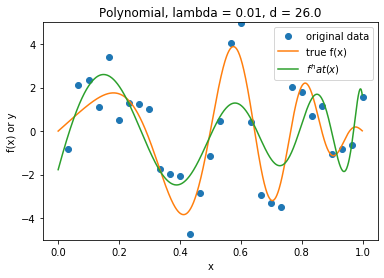

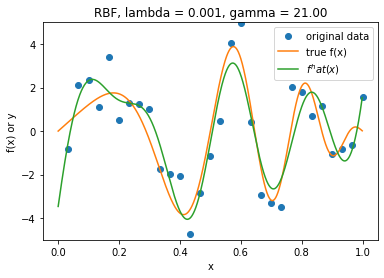

In [38]:
# =============================================================================
# b plot    
# =============================================================================

xx = np.arange(0,1,0.001)
f_x = 4*np.sin(np.pi*xx)*np.cos(6*np.pi*(xx**2))
#poly
plot_poly(X,y,xx,f_x,best_lambda_poly,best_d)
#RBF
plot_RBF(X,y,xx,f_x,best_lambda_RBF,best_gamma)

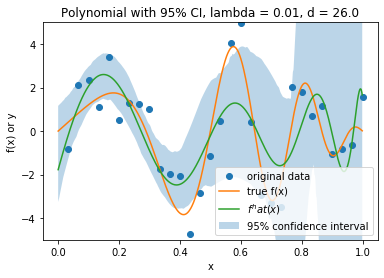

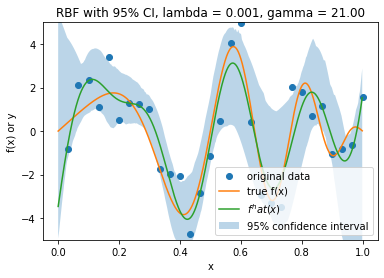

In [39]:
# =============================================================================
# c     bootstrap
# =============================================================================
B = 300
n = 30
#poly
f_hat_table_poly = bootstrap_poly(best_d,best_lambda_poly,X,y,xx,B,n)
lower_poly,upper_poly = np.percentile(f_hat_table_poly,[2.5,97.5],axis=0)
plot_bootstrap_poly(X,y,xx,f_x,best_lambda_poly,best_d,lower_poly,upper_poly)

#RBF
f_hat_table_RBF = bootstrap_RBF(best_lambda_RBF,best_gamma,X,y,xx,B,n)
lower_RBF,upper_RBF= np.percentile(f_hat_table_RBF,[2.5,97.5],axis=0)
plot_bootstrap_RBF(X,y,xx,f_x,best_lambda_RBF,best_gamma,lower_RBF,upper_RBF)

For polynomial kernel, lambda =  0.001  d =  21.0
For RBF kernel, lambda =  0.001  gamma =  21.0


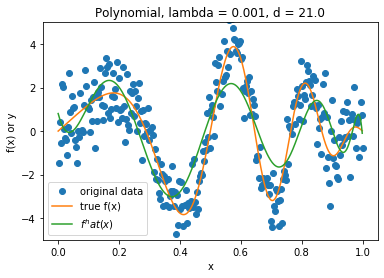

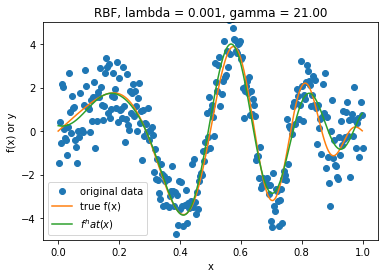

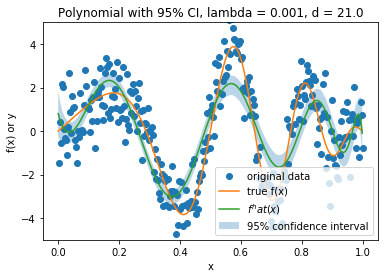

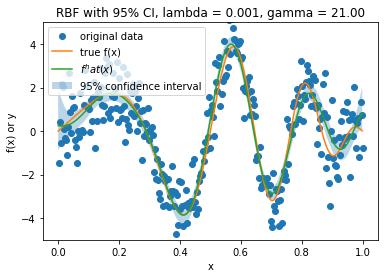

In [9]:
# =============================================================================
# d     repeat a,b,c with n = 300, 10-fold cv
# =============================================================================
X,y = create_data(300) 
K = 10

cost_history_poly = K_fold_poly(X, y, lamda_list,d_list,K)       
best_lambda_poly = lamda_list[int(np.floor(cost_history_poly.argmin() /len(d_list)))]
best_d = d_list[int(np.ceil(cost_history_poly.argmin() /len(lamda_list)))]
print("For polynomial kernel, lambda = ", best_lambda_poly, " d = ",best_d)

#RBF kernel
gamma_list  = np.arange(1.0, 50.0, 5)

cost_history_RBF = K_fold_RBF(X, y, lamda_list, gamma_list,K)        
best_lambda_RBF = lamda_list[int(np.floor(cost_history_RBF.argmin() /len(gamma_list)))]
best_gamma = gamma_list[int(np.ceil(cost_history_RBF.argmin() /len(lamda_list)))]
print("For RBF kernel, lambda = ", best_lambda_RBF, " gamma = ",best_gamma)
# b plot    
xx = np.arange(0,1,0.001)
f_x = 4*np.sin(np.pi*xx)*np.cos(6*np.pi*(xx**2))
#poly
plot_poly(X,y,xx,f_x,best_lambda_poly,best_d)
#RBF
plot_RBF(X,y,xx,f_x,best_lambda_RBF,best_gamma)


# c     bootstrap
B = 300
n = 300
#poly
f_hat_table_poly = bootstrap_poly(best_d,best_lambda_poly,X,y,xx,B,n)
lower_poly,upper_poly = np.percentile(f_hat_table_poly,[2.5,97.5],axis=0)
plot_bootstrap_poly(X,y,xx,f_x,best_lambda_poly,best_d,lower_poly,upper_poly)

#RBF
f_hat_table_RBF = bootstrap_RBF(best_lambda_RBF,best_gamma,X,y,xx,B,n)
lower_RBF,upper_RBF= np.percentile(f_hat_table_RBF,[2.5,97.5],axis=0)
plot_bootstrap_RBF(X,y,xx,f_x,best_lambda_RBF,best_gamma,lower_RBF,upper_RBF)

In [10]:
# =============================================================================
# e     
# =============================================================================
#additional data
B = 300
m = 1000
n = m
add_X,add_y = create_data(m) 
table = Poly_RBF(best_d,best_lambda_poly,best_lambda_RBF,best_gamma,add_X,add_y,xx,B,n)
lower_RBF,upper_RBF= np.percentile(table,[2.5,97.5],axis=0)
print("For RBF kernel, the lower bound is  ", lower_RBF, " upper bound is ",upper_RBF)

For RBF kernel, the lower bound is   [-1.35258286]  upper bound is  [-0.81717693]


In [1]:
"""
Created on Sun May 17 00:09:39 2020
HW3 A4 K-MEANS
@author: Leah
"""

import numpy as np
import matplotlib.pyplot as plt 
from copy import deepcopy
from mnist import MNIST

# Number of clusters
K = 10

def load_dataset():
    mndata = MNIST('./data/')
    #mndata = MNIST('./dir_with_mnist_data_files')
    X_train, labels_train = map(np.array, mndata.load_training()) 
    X_test, labels_test = map(np.array, mndata.load_testing()) 
    X_train = X_train/255.0
    X_test = X_test/255.0
    return X_train, labels_train, X_test, labels_test
  
def kmeans(X,K):
    #X = X_train
    # Number of training data
    n = X.shape[0]
    # Number of features in the data 
    c = X.shape[1]
    ###randomly pick K cluster centers(centroids).
    mean = np.mean(X, axis = 0)
    std = np.std(X, axis = 0)
    centers = np.random.randn(K,c) *std + mean
    centers_old = np.zeros(centers.shape) # to store old centers 
    centers_new = deepcopy(centers) # Store new centers
    clusters = np.zeros(n) 
    distances = np.zeros((n,K))
    error = np.linalg.norm(centers_new - centers_old)
    iteration = 0
    obj = list()
    # When, after an update, the estimate of that center stays the same, exit￿ ,!loop
    while error > 0.1:
        objective = 0
        train_error = list()
        # Measure the distance to every center 
        for i in range(K):
            distances[:,i] = np.linalg.norm(X - centers_new[i], axis=1) # Assign all training data to closest center
        clusters = np.argmin(distances, axis = 1)
        centers_old = deepcopy(centers_new) ###recompute centroids
        for i in range(K):
            centers_new[i] = np.mean(X[clusters == i], axis=0) 
            error = np.linalg.norm(centers_new - centers_old)
            objective = objective + np.sum((X[clusters == i] - centers_new[i])**2)
            train_error.append(np.sum((X - centers_new[i])**2))
        iteration += 1 
        #objective = np.sum([np.sum(distances[clusters==c, c])/np.sum(clusters==c)
        #                         if np.any(clusters==c) else 0 for c in range(K)])
        obj.append((iteration, objective))
    return centers_new, clusters ,obj, min(train_error)/len(X_train)

def kmeans_test(X_test,centers):
    distances = np.zeros((X_test.shape[0],K))
    objective = 0
    test_error = list()
    for i in range(K):
        distances[:,i] = np.linalg.norm(X_test - centers[i], axis=1) # Assign all training data to closest center
    clusters = np.argmin(distances, axis = 1)
    for i in range(K):
        objective = objective + np.sum((X_test[clusters == i] - centers[i])**2)
        test_error.append(np.sum((X_test - centers[i])**2))
    return  objective , min(test_error)/len(X_test)

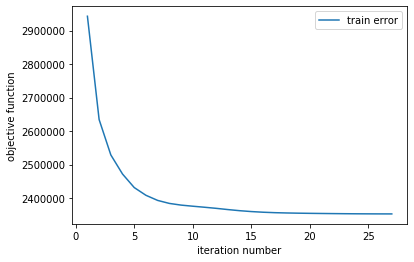

In [2]:
X_train, labels_train, X_test, labels_test = load_dataset()
 
centers, clusters, obj, train_error = kmeans(X_train, K)

obj =  np.array(obj)
#plot
plt.figure()
plt.plot(obj[:,0],obj[:,1],label='train error')
plt.xlabel('iteration number')
plt.ylabel('objective function')
#plt.title('objective function versus iteration number')
plt.legend()
#plt.ylim([-5,5])



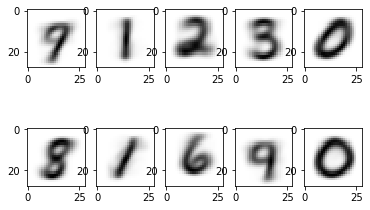

In [3]:
fig, ax = plt.subplots(2,5)
for i, ax in enumerate(ax.flatten()):
    plottable_image = np.reshape(centers[i,:], (28, 28))
    ax.imshow(plottable_image, cmap='gray_r')


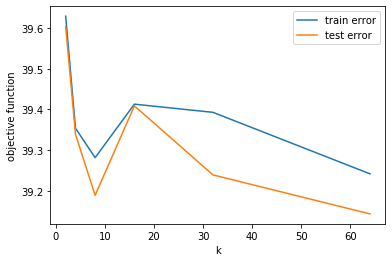

In [4]:
# =============================================================================
# part c 
# =============================================================================
K_list = np.array([2, 4, 8, 16, 32, 64])
result = list()
for k in K_list:
    centers, clusters, obj_train, train_error = kmeans(X_train, K)
    obj_test, test_error = kmeans_test(X_test, centers)
    result.append((k,train_error,test_error))

result = np.array(result)
#plot
plt.figure()
plt.plot(result[:,0],result[:,1],label='train error')
plt.plot(result[:,0],result[:,2],label='test error')
plt.xlabel('k')
plt.ylabel('objective function')
plt.legend()

In [1]:
#hw5_A5 NN

import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from copy import deepcopy
from mnist import MNIST
import torch
import torch.nn as nn
import torch.nn.functional as F


def load_dataset():
    mndata = MNIST('./data/')
    #mndata = MNIST('./dir_with_mnist_data_files')
    X_train, labels_train = map(np.array, mndata.load_training()) 
    X_test, labels_test = map(np.array, mndata.load_testing()) 
    X_train = X_train/255.0
    X_test = X_test/255.0
    return X_train, labels_train, X_test, labels_test

def onehot(X): 
    '''
    For each yi let yi be the one-hot encoding of yi (i.e., yi ∈ {0, 1}^k 
    is a vector of all zeros aside from a 1 in the yith index).
    k = 10
    '''
    n_classes = 10
    ## transform labels_train(n-by-1) into n-by-k 
    Y = np.zeros((len(X),n_classes))
    for i in range(0,len(Y)):
        Y[i,X[i]] = 1 
    return Y


In [2]:
#load data
X_train, labels_train, X_test, labels_test = load_dataset()
X_train = torch.tensor(X_train)
X_test = torch.tensor(X_test)
y_test = torch.tensor(labels_test)
y_train = torch.tensor(labels_train)
y_train = y_train.long()
y_test = y_test.long()

learning_rate = 0.01
accuracy = 0.99


In [ ]:
# =============================================================================
# part a
# =============================================================================
#Weight Initialization
h = 64  # # of hidden units  
k = 10
d = 28*28
alpha = 1/np.sqrt(k)
W_0 = torch.tensor(np.random.uniform(-alpha, alpha, (h, d)),requires_grad=True)
W_1 = torch.tensor(np.random.uniform(-alpha, alpha, (k, h)),requires_grad=True)
b_0 = torch.tensor(np.random.uniform(-alpha, alpha, (h,1)),requires_grad=True)
b_1 = torch.tensor(np.random.uniform(-alpha, alpha, (1,k)),requires_grad=True)

#training NN
optim = torch.optim.Adam({W_0,W_1,b_0,b_1}, lr=learning_rate)
train_error = list()
accu = 0
iteration = 0
while accu < accuracy:
    y_hat = torch.matmul(F.relu(torch.matmul(W_0, X_train.T)+ b_0.repeat(1,len(X_train))).T,W_1.T)+b_1.repeat(len(X_train),1)
    loss =  torch.nn.functional.cross_entropy(y_hat, y_train)
    optim.zero_grad()
    loss.backward() 
    optim.step()
    train_error.append((iteration,loss.detach().numpy()))
    accu = sum(torch.argmax(y_hat,dim = 1) == y_train).numpy() / len(y_train)
    iteration += 1



In [ ]:
#plot
train_error = np.array(train_error) 
plt.figure()
plt.plot(train_error[:,0],train_error[:,1])
plt.xlabel('epoch')
plt.ylabel('train error')
plt.legend()

In [13]:
for i in range(4):
    a = optim.param_groups[0]['params'][i].size()[0]
    b = optim.param_groups[0]['params'][i].size()[1]
    if a == h and b == d:
        W_0 = optim.param_groups[0]['params'][i]
    elif a == k and b == h:
        W_1 = optim.param_groups[0]['params'][i]
    elif b == 1:
        b_0 = optim.param_groups[0]['params'][i]
    else:
        b_1 = optim.param_groups[0]['params'][i]

#evaluate the model on the test data and report both the accuracy and the loss.
y_hat = torch.matmul(F.relu(torch.matmul(W_0, X_test.T)+ b_0.repeat(1,len(X_test))).T,W_1.T)+b_1.repeat(len(X_test),1)
test_loss =  torch.nn.functional.cross_entropy(y_hat, y_test)
test_accu = sum(torch.argmax(y_hat,dim = 1) == y_test).numpy() / len(y_test)
print("The accuracy of test data is {}, the error is {}".format(test_accu, test_loss))
print('the number of parameters'.format(h*d+k*h+k+h))

The accuracy of test data is 0.9696, the error is 0.10341335476065462


In [ ]:
# =============================================================================
# part b a narrow but deeper network
# =============================================================================
h_0 = h_1 = 32  # # of hidden units  
k = 10
d = 28*28
alpha = 1/np.sqrt(k)
W_0 = torch.tensor(np.random.uniform(-alpha, alpha, (h_0, d)),requires_grad=True)
W_1 = torch.tensor(np.random.uniform(-alpha, alpha, (h_1, h_0)),requires_grad=True)
W_2 = torch.tensor(np.random.uniform(-alpha, alpha, (k, h_1)),requires_grad=True)
b_0 = torch.tensor(np.random.uniform(-alpha, alpha, (h_0,1)),requires_grad=True)
b_1 = torch.tensor(np.random.uniform(-alpha, alpha, (1,h_1)),requires_grad=True)
b_2 = torch.tensor(np.random.uniform(-alpha, alpha, (1,k)),requires_grad=True)

optim = torch.optim.Adam({W_0,W_1,W_2,b_0,b_1,b_2}, lr=learning_rate)
train_error = list()
accu = 0
iteration = 0
while accu < accuracy:
    layer1 = torch.matmul(W_0, X_train.T)+ b_0.repeat(1,len(X_train))   #h_0 by n
    layer2 = torch.matmul(F.relu(layer1).T,W_1.T) + b_1.repeat(len(X_train),1)   # n by h_1
    y_hat = torch.matmul(W_2,F.relu(layer2).T).T + b_2.repeat(len(X_train),1)
    
    #y_hat = torch.matmul(W_2,F.relu(torch.matmul(F.relu(torch.matmul(W_0, X_train.T)+ b_0.repeat(1,len(X_train))).T,W_1.T) + b_1.repeat(len(X_train),1) ).T).T + b_2.repeat(len(X_train),1)
    loss =  torch.nn.functional.cross_entropy(y_hat, y_train)
    optim.zero_grad()
    loss.backward() 
    optim.step()
    train_error.append((iteration,loss.detach().numpy()))
    accu = sum(torch.argmax(y_hat,dim = 1) == y_train).numpy() / len(y_train)
    iteration += 1

train_error = np.array(train_error)     
#plot
plt.figure()
plt.plot(train_error[:,0],train_error[:,1])
plt.xlabel('epoch')
plt.ylabel('train error')
plt.legend()


In [14]:
for i in range(4):
    a = optim.param_groups[0]['params'][i].size()[0]
    b = optim.param_groups[0]['params'][i].size()[1]
    if a == h_0 and b == d:
        W_0 = optim.param_groups[0]['params'][i]
    if a == h_1 and b == h_0:
        W_1 = optim.param_groups[0]['params'][i]
    elif a == k and b == h_1:
        W_2 = optim.param_groups[0]['params'][i]
    elif b == 1:
        b_0 = optim.param_groups[0]['params'][i]
    elif a == 1 and b == h_1:
        b_1 = optim.param_groups[0]['params'][i]
    else:
        b_2 = optim.param_groups[0]['params'][i]

#evaluate the model on the test data and report both the accuracy and the loss.
layer1 = torch.matmul(W_0, X_test.T)+ b_0.repeat(1,len(X_test))   #h_0 by n
layer2 = torch.matmul(F.relu(layer1).T,W_1.T) + b_1.repeat(len(X_test),1)   # n by h_1
y_hat = torch.matmul(W_2,F.relu(layer2).T).T + b_2.repeat(len(X_test),1)
test_accu = sum(torch.argmax(y_hat,dim = 1) == y_test).numpy() / len(y_test)
print("The accuracy of test data is {}, the error is {}".format(test_accu, test_loss))

The accuracy of test data is 0.9632, the error is 0.10341335476065462


In [ ]:
print('the number of parameters for network 1 :',h*d+k*h+k+h)
print('the number of parameters for network 2 :', h_0*d+h_0*h_1 + k*h_1+k+h_0+h_1)

In [ ]:
# =============================================================================
# part c comparision
# =============================================================================
For wide, shallow network, there are 4 parameters and the accuracy is 0.9696.
For narrow, deeper network, there are 6 parameters which is larger than another 
network and the accuracy is 0.9632 which is worse than the other one but the difference is trival.
intuitively, the wide shallow network has a better performence due to less parameters
usually means lower memory usage and faster infrence.



In [15]:
"""
Created on Mon May 18 11:26:45 2020
HW3 A6 PCA
@author: Leah
"""

import numpy as np
import matplotlib.pyplot as plt 
from mnist import MNIST

def load_dataset():
    mndata = MNIST('./data/')
    #mndata = MNIST('./dir_with_mnist_data_files')
    X_train, labels_train = map(np.array, mndata.load_training()) 
    X_test, labels_test = map(np.array, mndata.load_testing()) 
    X_train = X_train/255.0
    X_test = X_test/255.0
    return X_train, labels_train, X_test, labels_test

def topK(dataMat):
    meanVals = np.mean(dataMat, axis=0)
    meanRemoved = dataMat - meanVals
    eigVals,eigVects = np.linalg.eig(np.dot(meanRemoved.T,meanRemoved)/len(X_train))
    idx = eigVals.argsort()[::-1]
    eig_vals = eigVals[idx]
    eig_vecs = eigVects[:,idx]

    return meanVals, eig_vals,eig_vecs

def mean_squared_error(U, V):
    error = np.mean((U - V)**2)
    return error

In [16]:
# =============================================================================
# load data
# =============================================================================
d = 28*28
X_train, labels_train, X_test, labels_test = load_dataset()

In [17]:
# =============================================================================
# part a
# =============================================================================
mu, eig_vals, eig_vecs = topK(X_train)
for i in [0,1,9,29,49]:
    print('\n {}th  Eigenvalues {}\n'.format(i+1, eig_vals[i]))
print('Sum of Eigenvalues : ', np.sum(eig_vals))


 1th  Eigenvalues 5.116787728342092


 2th  Eigenvalues 3.7413284788648316


 10th  Eigenvalues 1.2427293764173317


 30th  Eigenvalues 0.3642557202788918


 50th  Eigenvalues 0.16970842700672786

Sum of Eigenvalues :  52.725035495127


Text(0, 0.5, 'Uncaptured variance ratio')

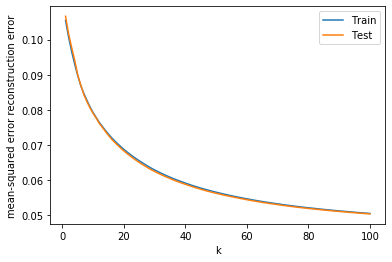

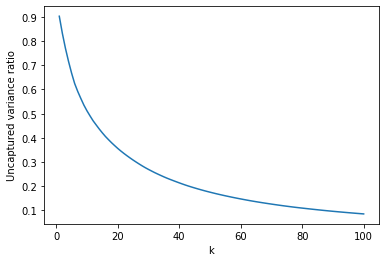

In [18]:
# =============================================================================
# part c
# =============================================================================
#reconstruction error
mse_train = []
mse_test = []
ration_egivals = []
k_list = np.arange(1,101)

for k in k_list:
    EigenVectors = eig_vecs[:,0:k] #n特征数 by k
    Final_train = np.dot(np.dot(X_train - mu, EigenVectors),EigenVectors.T)
    Final_test = np.dot(np.dot(X_test - mu, EigenVectors),EigenVectors.T)
    mse_train.append(mean_squared_error(X_train, Final_train))
    mse_test.append(mean_squared_error(X_test, Final_test))
    ration_egivals.append(1-np.sum(eig_vals[0:k])/np.sum(eig_vals))

#plot1
plt.figure()
plt.plot(k_list,mse_train,label = 'Train')
plt.plot(k_list,mse_test,label = 'Test')
plt.xlabel('k')
plt.ylabel('mean-squared error reconstruction error')
plt.legend()

#plot2
plt.figure()
plt.plot(k_list,ration_egivals)
plt.xlabel('k')
plt.ylabel('Uncaptured variance ratio')

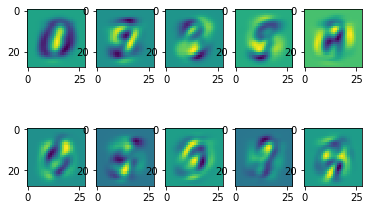

In [19]:
# =============================================================================
# part d Display first 10 egenvectors as image
# =============================================================================
fig, ax = plt.subplots(2,5)
for i, ax in enumerate(ax.flatten()):
    plottable_image = np.reshape(eig_vecs[:,i], (28, 28))
    ax.imshow(plottable_image)

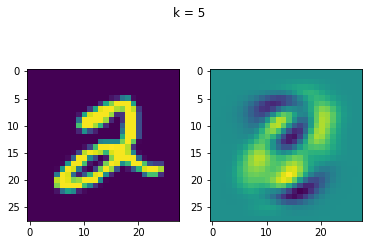

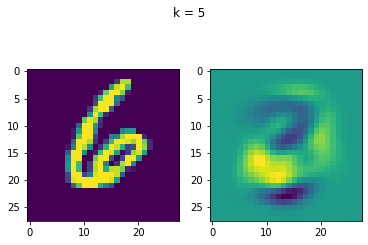

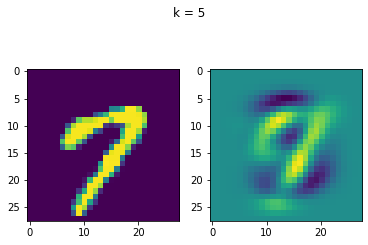

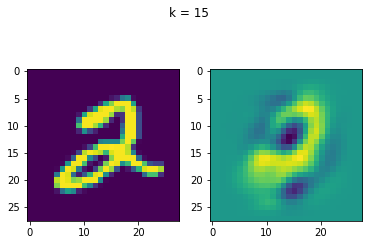

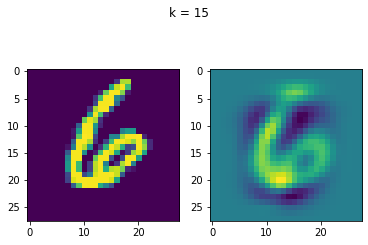

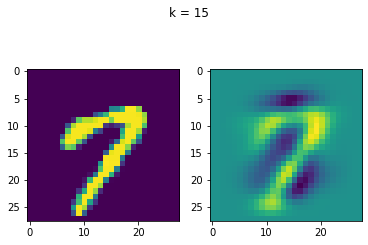

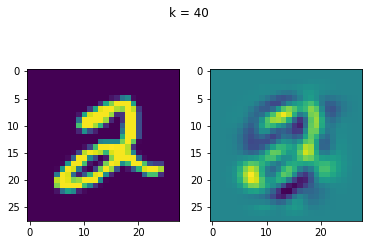

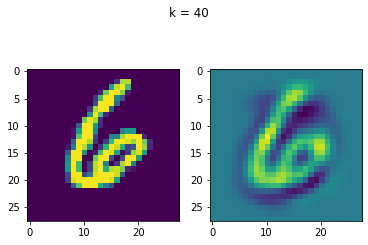

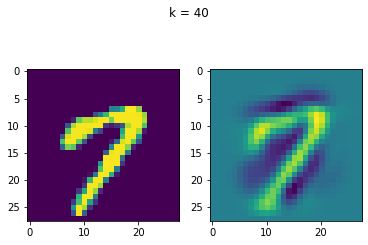

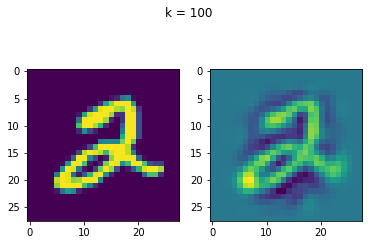

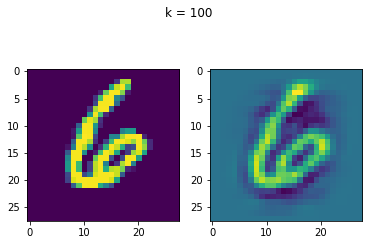

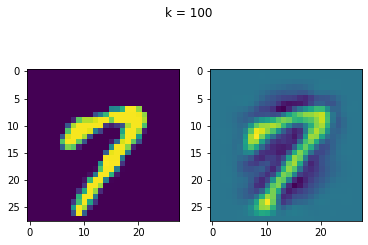

In [20]:
# =============================================================================
# visualize a set of reconstructed digits 
# from the training set for different values of k.
# =============================================================================
#choose an image from each digit arbitrarily
X_train_2 = X_train[labels_train == 2][0]
X_train_6 = X_train[labels_train == 6][0]
X_train_7 = X_train[labels_train == 7][0]
for k in [4,14,39,99]:
    for i in [2, 6, 7]:
        X_digit = X_train[labels_train == i][0]
        EigenVectors = eig_vecs[:,0:k] 
        transform = np.dot(np.dot(X_digit - mu, EigenVectors),EigenVectors.T)
        
        #ploting 
        fig, ax = plt.subplots(1,2)
        plottable_image = np.reshape(X_digit, (28, 28))
        ax[0].imshow(plottable_image)
        plottable_image = np.reshape(transform, (28, 28))
        ax[1].imshow(plottable_image)
        fig.suptitle('k = {}'.format(k+1))